# Анализ компьютерных игр

<a id='task'></a>
## Постановка задачи

**Тема проекта:** "Анализ данных продаж компьютерных игр по 2016 год включительно для интернет-магазина".

### Назначение

**Цель проекта:** выявить определяющие успешность игры закономерности, чтобы понять, как будет выглядеть потенциально популярный продукт и как спланировать рекламные кампании.

### Структура проекта
1. [Постановка задачи][1]
    1. Назначение
    2. Структура проекта
    3. Описание данных
2. [Общая информация о данных][2]
    1. [Загрузка данных][2.1]
    2. [Изучение общей информации][2.2]
3. [Предобработка данных][3]
    1. [Названия столбцов][3.1]
    2. [Обработка пропусков][3.2]
    3. [Преобразование типа данных][3.3]
    4. [Суммарные продажи][3.4]
    5. [Дубликаты][3.5]
4. [Исследовательский анализ данных][4]
    1. [Количество выпущенных игр по годам][4.1]
    2. [Продажи по платформам][4.2]
    3. [Актуальный период][4.3]
    4. [Диаграмма размаха по глобальным продажам игр по платформам][4.4]
    5. [Влияние отзывов на продажи][4.5]
    6. [Распределение игр по жанрам][4.6]
5. [Портрет пользователя каждого региона][5]
    1. [Самые популярные платформы (топ-5)][5.1]
    2. [Самые популярные жанры (топ-5)][5.2]
    3. [Влияние рейтинга на продаже в регионе][5.3]
6. [Гипотезы][6]
7. [Общие выводы][7]

[1]:#task
[2]:#general
[2.1]:#load
[2.2]:#info
[3]:#preprocess
[3.1]:#columns
[3.2]:#null
[3.3]:#type
[3.4]:#world
[3.5]:#dupl
[4]:#research
[4.1]:#game_by_year
[4.2]:#platform
[4.3]:#period
[4.4]:#boxplot
[4.5]:#review
[4.6]:#top_genre
[5]:#port
[5.1]:#topplat
[5.2]:#topgen
[5.3]:#rat
[6]:#hyp
[7]:#fin

### Описание данных

- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

<a id='general'></a>
## Общая информация о данных

<a id='load'></a>
### Загрузка данных

Импортируем необходимые библиотеки.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#игнорируем предупреждение
import warnings
warnings.simplefilter("ignore", UserWarning)

import numpy as np
from scipy import stats as st
from scipy.stats import binom

D:\anaconda\envs\practicum\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Считываем данные.

In [2]:
try:
    games = pd.read_csv('/datasets/games.csv', sep=',')
except:
    games = pd.read_csv('/games.csv', sep=',')

<a id='info'></a>
### Изучение общей информации

Выводим первые 10 строк датафрейма.

In [3]:
games.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Выводим основную информацию о датафрейме.

In [4]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


**Вывод:** при общем осмотре данных замечены пропуски в столбцах `Name, Year_of_Release, Genre, Critic_Score, User_Score. Rating`, тип данных столбца `Year_of_Release` - неправильный, год - целое число.
Всего датафрейм содержит 16 715 записей.

<a id='preprocess'></a>
## Предобработка данных

- Пропуски в столбце `Name` невозможно заполнить самостоятельно, поэтому такие строки придется удалить. 
- `Year_of_Release` - год релиза, нельзя заполнить средним или медианной или нулем, поэтому пропущенные значения попробуем найти в релизах этой же игры на другой платформе. От оставшихся пропусков избавимся. Тип данных в этом столбце необходимо поменять на целое число, с `float` на `int`.
- Пропуски в `Genre` можно заполнить самостоятельно, проверив в интернете жанр - пропущенные значения встречаются всего лишь в двух записях. 
- `Critic_Score, User_Score` - оценка критиков и оценка игроков. Пропусков много, но заменить медианным или средним значением их нельзя, слишком много влияет на оценку каждой отдельной игры.
- `Rating` - рейтинг ESRB, пропуски также невозможно заменить медианным или средним значением.

Пропуски в столбцах с  оценками от критиков и игроков могли появится из-за отсутсвия или слишком малого количества данных по позиции, пропущенные значения в рейтинге могут встречаться в играх, которые появились до ESRB (это проверим далее), или в играх, где рейтинг по той или иной причине отсутствует, отсутсвие данных в названии, жанре и годе релиза, скорее всего, связаны с техническими ошибками при записи, получении и тд. данных. 

<a id='columns'></a>
### Названия столбцов

Заменим названия всех столбцов, приведя их к нижнему регистру.

In [5]:
games = games.rename(columns=lambda x: x.lower())

In [6]:
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


<a id="null"></a>
### Обработка пропусков

#### name

Невозможно найти логическое значение пропускам в стобце `name`. Таких записей всего две, удалим их из датафрейма.

In [7]:
print('Отношение пропусков к датафрейму равно ', 
      '{:.2%}'.format(len(games[games['name'].isna() == True])/len(games)))

games = games.dropna(axis=0, subset=['name'])
games['name'].isna().sum()

Отношение пропусков к датафрейму равно  0.01%


0

####  year_of_release

Проверяем пропуски в year_of_release

In [8]:
games[games['year_of_release'].isna() == True]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Берем одну игру из тех, у которых отсутствует год релиза и проверяем, есть ли она на других платформах.

In [9]:
games[(games['name'] == 'Inversion')]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
12146,Inversion,PS3,2012.0,Shooter,0.03,0.03,0.0,0.01,56.0,5.4,M
12678,Inversion,X360,2012.0,Shooter,0.03,0.02,0.0,0.01,53.0,6.5,M
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.0,0.00,59.0,6.7,M


Заполняем пропуски года редиза тех игр, у которых есть релиз на других платформах.

In [10]:
for row in games[games['year_of_release'].isnull() == True].index:  
    games.loc[row, 'year_of_release'] =\
    games.loc[games['name'] == games['name'][row], 'year_of_release'].max()

Проверяем количество пропусков в столбце `year_of_release`.

In [11]:
games['year_of_release'].isna().sum()

146

In [12]:
print('Отношение пропусков к датафрейму равно ', \
      '{:.2%}'.format(len(games[games['year_of_release']\
                                .isna() == True])/len(games)))

Отношение пропусков к датафрейму равно  0.87%


Оставшиеся пропуски логически заполнить невозможно. Так как процент пропусков в столбце `year_of_release` составляет 0.87% от всего датафрейма, удаляем такие записи.

In [13]:
games = games.dropna(axis=0, subset=['year_of_release'])
games['year_of_release'].isna().sum()

0

#### genre

Проверяем количество пропусков в столбце `genre`.

In [14]:
games['genre'].isna().sum()

0

#### critic_score

Нельзя заполнить медианным или средним значением пропуски в столбце `critic_score`, проверяем уникальные значения. Оставляем записи с пропусками.

In [15]:
print(games['critic_score'].isna().sum())
games['critic_score'].unique()

8492


array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 13.])

#### user_score

Пропуски в столбце `user_score` также нельзя заполнить медианой или средним. Проверяем уникальные значения, записи с пропусками оставляем.

In [16]:
print(games['user_score'].isna().sum())
games['user_score'].unique()

6633


array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

'tbd' - значит 'to be determined', то есть на данный момент у игры нет пользовательской оценки. Заменяем 'tbd' на nan, что буквально значит "данные отсутствуют".

In [17]:
games['user_score'] = games['user_score'].replace('tbd', np.NaN)
games['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', '8.8', '6.9', '9.4', '6.8', '6.1',
       '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6', '3.7',
       '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '3.1',
       '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3', '2.7',
       '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0', '1.6',
       '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2', '2.3',
       '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'], dtype=object)

#### rating

Пропущенные значения в столбце rating нельзя заменить медианным или средним значением, проверяем уникальные значения. Оставляем записи с пропусками.

In [18]:
print(games['rating'].isna().sum())
games['rating'].unique()

6699


array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

<a id="type"></a>
### Преобразование типа данных

Перобразуем типы данных следующим образом:
- year_of_release - int, потому что в данном столбце содержится только год релиза игры, а это целое число;
- critic_score - int, потому что сто-балльная система представлена целым числом; 
- user_score - int, чтобы дальше было проще сравнивать данные, лучше привести пользовательскую оценку к целому значению в сто-балльной системе.

In [19]:
games['year_of_release'] = games['year_of_release'].astype('Int64')
games['critic_score'] = games['critic_score'].astype('Int64')

games['user_score'] = games['user_score'].astype('float') * 10
games['user_score'] = games['user_score'].astype('Int64')

In [20]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16567 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16567 non-null  object 
 1   platform         16567 non-null  object 
 2   year_of_release  16567 non-null  Int64  
 3   genre            16567 non-null  object 
 4   na_sales         16567 non-null  float64
 5   eu_sales         16567 non-null  float64
 6   jp_sales         16567 non-null  float64
 7   other_sales      16567 non-null  float64
 8   critic_score     8075 non-null   Int64  
 9   user_score       7540 non-null   Int64  
 10  rating           9868 non-null   object 
dtypes: Int64(3), float64(4), object(4)
memory usage: 1.6+ MB


In [21]:
games.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,80,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,<NA>,<NA>,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,83,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,80,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,<NA>,<NA>,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,<NA>,<NA>,NaN
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89,85,E
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58,66,E
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87,84,E
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,<NA>,<NA>,NaN


<a id='world'></a>
### Суммарные продажи

Считаем суммарные продажи во всех регионах и запишем их в отдельный столбец.

In [22]:
games.insert(8, 'world_sales', games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales'])
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,world_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,82.54,76,80,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,40.24,<NA>,<NA>,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,35.52,82,83,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,32.77,80,80,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,31.38,<NA>,<NA>,NaN


Проверяем есть ли нулевые продажи в таблице.

In [23]:
games[games['world_sales'] == games['world_sales'].min()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,world_sales,critic_score,user_score,rating
16676,G1 Jockey 4 2008,PS3,2008,Sports,0.0,0.0,0.0,0.0,0.0,<NA>,<NA>,NaN
16709,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,0.0,0.0,0.0,0.0,0.0,<NA>,<NA>,NaN


Есть две строки с нулевыми продажами по миру (скорее всего, их просто слишком мало, так как исчисление в столбцах в миллионах копий) и отсутсвующими оценками. Так как в этих записях нет продаж, копий или рейтинга - для анализа они бессмысленны, удаляем такие строки.

In [24]:
games = games[games['world_sales'] != 0]
games[games['world_sales'] == games['world_sales'].min()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,world_sales,critic_score,user_score,rating
15384,Order of War,PC,2009,Strategy,0.00,0.01,0.00,0.0,0.01,69,73,T
15486,Arslan: The Warriors of Legend,XOne,2016,Action,0.01,0.00,0.00,0.0,0.01,<NA>,58,T
15499,Motocross Mania 3,XB,2005,Racing,0.01,0.00,0.00,0.0,0.01,38,36,T
15520,Pump It Up: Exceed,XB,2005,Misc,0.01,0.00,0.00,0.0,0.01,74,75,T
15542,Digimon Rumble Arena 2,XB,2004,Fighting,0.01,0.00,0.00,0.0,0.01,65,88,T
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.0,0.01,<NA>,<NA>,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.0,0.01,<NA>,<NA>,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.0,0.01,<NA>,<NA>,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.0,0.01,<NA>,<NA>,NaN


<a id='dupl'></a>
### Дубликаты

Проверяем наличие явных дубликатов.

In [25]:
games.duplicated().sum()

0

Проверяем наличие неявных дубликатов.

In [26]:
print(games['platform'].unique())
print()
print(games['genre'].unique())

['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' 'PS4' '3DS' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'WiiU' 'GC' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']

['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy']


**Вывод:** в процессе предобработки данных сделано следующее
- названия столбцов приведены к нижнему регистру;
- обработаны пропуски в столбцах;
    - пропуски в столбце name удалены, т.к. их невозможно заполнить самостоятельно.
    - в столбце `year_of_release` некоторые пропущенные значения заменены годом, найденным в релизах этой же игры на другой платформе. Оставшиеся пропуски удалены.
    - `critic_score`, `user_score содержат` много попусков, но их нельзя заменить медианным или средним значением, слишком много влияет на оценку каждой отдельной игры. Пропуски в данных столбцах не тронуты.
    - в `rating` пропуски также не тронуты, их тоже невозможно заменить медианным или средним значением.

Пропуски в столбцах с оценками от критиков и игроков могли появится из-за отсутсвия или слишком малого количества данных по позиции, пропущенные значения в рейтинге могут встречаться в играх, которые появились до ESRB, или в играх, где рейтинг по той или иной причине отсутствует, отсутсвие данных в названии, жанре и годе релиза, скорее всего, связаны с техническими ошибками при записи, получении и тд. данных.
- преобразованы типы данных; 
    - `year_of_release` из `float` в `int`, т.к. год - целое число;
    - `critic_score` - из `float` в `int`, т.к. сто-балльная система представлена целым числом;
    - `user_score` - из `object` в `float` в `int`, чтобы дальше было проще сравнивать данные, пользовательская оценка приведена к целому значению в сто-балльной системе.
- создан столбец `world_sales`, содержащий суммарные продажи каждой игры во всех регионах;
- удалены строки без продаж, оценок и рейтинга.
- дубликаты отсутствуют.

<a id='research'></a>
## Исследовательский анализ данных

<a id='game_by_year'></a>
### Количество выпущенных игр по годам

In [27]:
games_by_year = games\
.pivot_table(
    index='year_of_release', 
    values='name', 
    aggfunc='count'
)
games_by_year

,name
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14
1985,14
1986,21
1987,16
1988,15


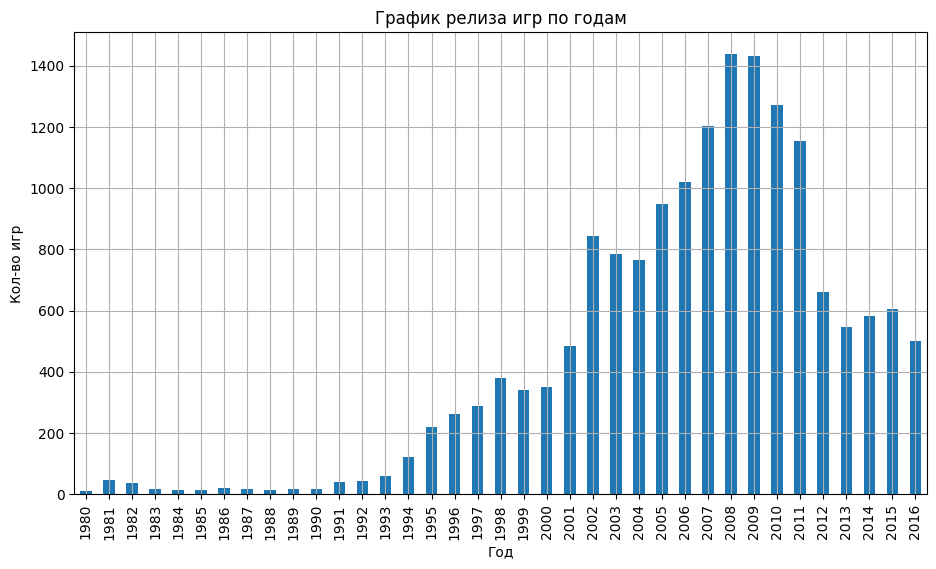

In [28]:
games_by_year.plot(
    kind='bar',
    grid=True, 
    figsize=(11, 6), 
    title='График релиза игр по годам',
    legend=None
)
plt.ylabel('Кол-во игр')
plt.xlabel('Год')
plt.show()

**Вывод:** на графике видно, как количество выпущенных игр, начиная с 90-х продолжает расти, но после пика 2008-2009 годов показатели резко падают. Для дальшейшего анализа можно не учитывать данные раннее 1993 года, так как в эти годы слишком мало релизов.

в 80-х годах персональные компьютеры и игровые консоли только-только становятся доступными для широкой публики и именно в эти года компьютерные игры входят в поп-культуру. 

90-е годы ознаменованы заметными инновациями в компьютерных играх: переход от растровой графики к полностью полигональному 3D, снижение популярности аркадных игр и появление нескольких новых жанров - шутер от первого лица, стратегия в реальном времени и MMO. Портативные игры становятся все более популярными на протяжении десятилетия, отчасти благодаря выпуску Game Boy в 1989 году. Основные события 1990-х годов включают популяризацию компьютерной 3D-графики, использующей полигоны, а также начало более крупных объединений издателей, появления более высокобюджетных игр, увеличение размеров производственных команд и сотрудничество как с музыкальной, так и с кино-индустрией. 
Сами игры стали более сюжетно-ориентированными и разнообразными в плане геймплея, а к концу 90-х появились озвучка и физика, позволяющая манипулировать объектами в игре. 

2000-2010-е продемонстрировали инновации как среди консолей, так и ПК, а также растущую конкуренцию на рынке портативных игровых систем. Влияние большей доступности Интернета привело к новым изменениям игрового процесса, изменениям в игровом оборудовании и появлению онлайн-сервисов для игровых консолей.
В Китае игровые консоли были запрещены в июне 2000 года (снят в 2015). Это привело к взрыву популярности компьютерных игр, особенно MMO.

В 2007 году случился кризис, и хоть игровая индустрия пострадала от него меньше других, изменения были необходимы. В итоге большие корпорации пересмотрели стратегию и стали вкладывать основные ресурсы в большие и высоко-бюджетные тайтлы, способные выдержать конкуренцию, а все остальные ресурсы перенаправить в сектор мобильных и онлайн-игр.

<a id='platform'></a>
### Продажи по платформам

Находим топ 10 игровых платформ по продажам игр.

In [29]:
platform_sales = games\
.pivot_table(
    index='platform', 
    values='world_sales', 
    aggfunc='sum'
)\
.sort_values(by='world_sales', ascending=False)\
.reset_index()\
.head(10)
# список 10 самых продаваемых платформ
platforms = platform_sales['platform']
platform_sales

,platform,world_sales
0,PS2,1247.16
1,X360,966.61
2,PS3,935.19
3,Wii,903.31
4,DS,804.28
5,PS,727.58
6,PS4,314.14
7,GBA,313.73
8,PSP,293.57
9,PC,258.86


Группируем данные по продажам каждой платформы за каждый год.

In [30]:
sales_by_platform = games\
.query('platform in @platforms')\
.groupby(['year_of_release', 'platform'])\
.agg({'world_sales': ['sum']})\
.reset_index()
sales_by_platform.tail(15)

,year_of_release,platform,world_sales
,,,sum
103,2014,PS4,100.00
104,2014,PSP,0.24
105,2014,Wii,3.75
106,2014,X360,34.74
107,2015,PC,8.52
108,2015,PS3,16.82
109,2015,PS4,118.90
110,2015,PSP,0.12
111,2015,Wii,1.14


Строим графики.

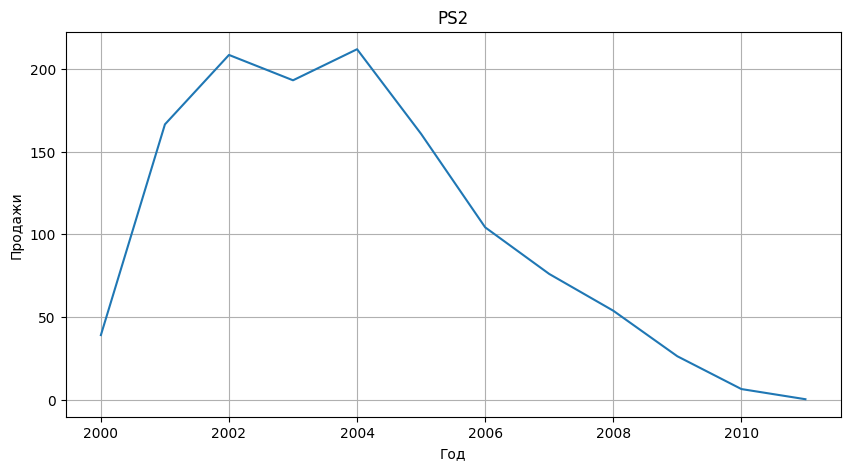

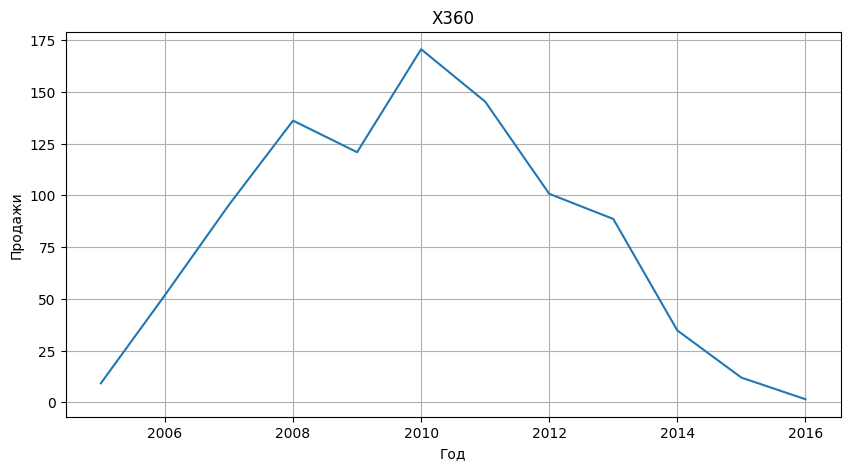

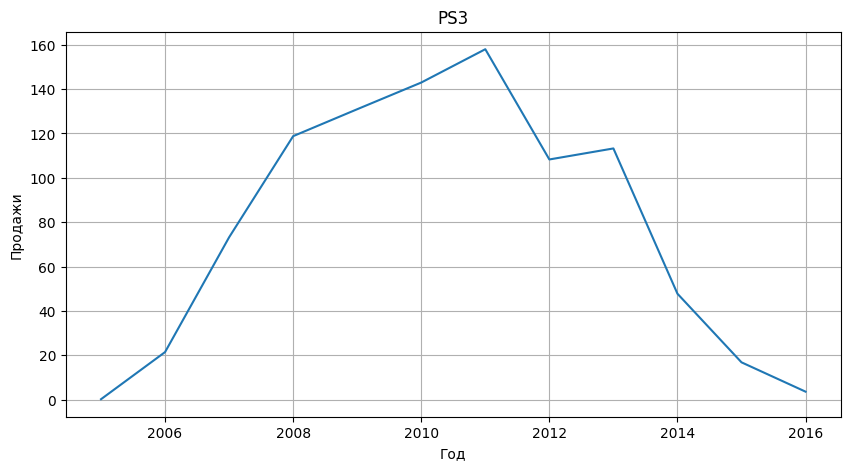

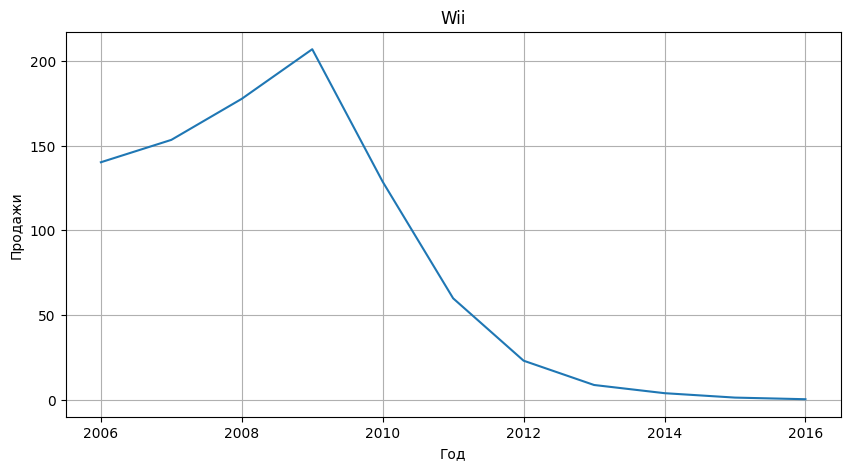

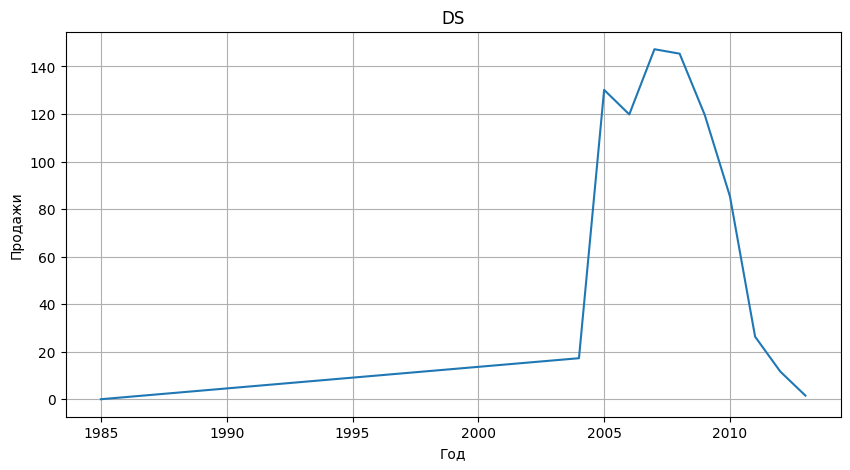

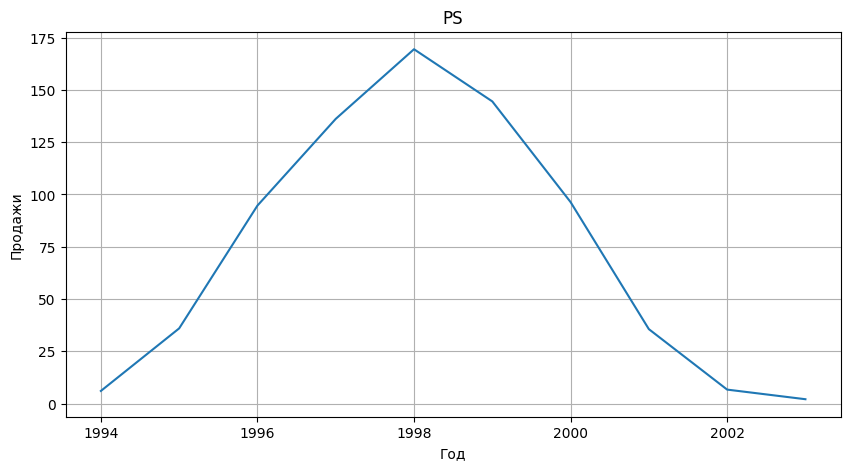

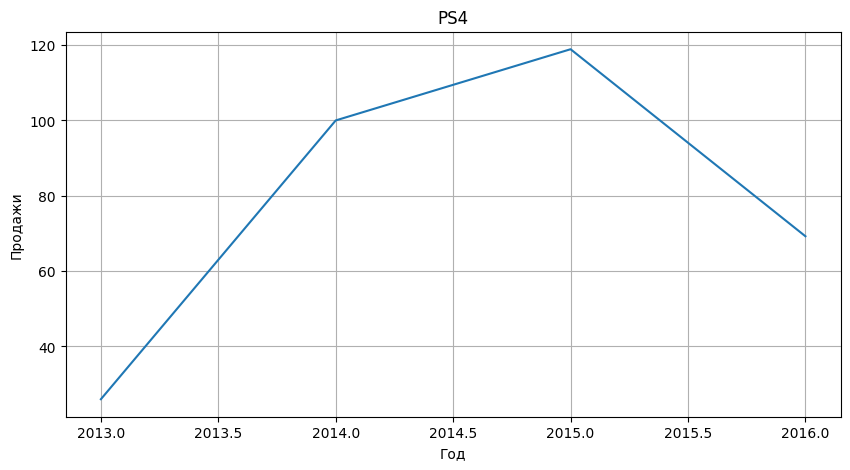

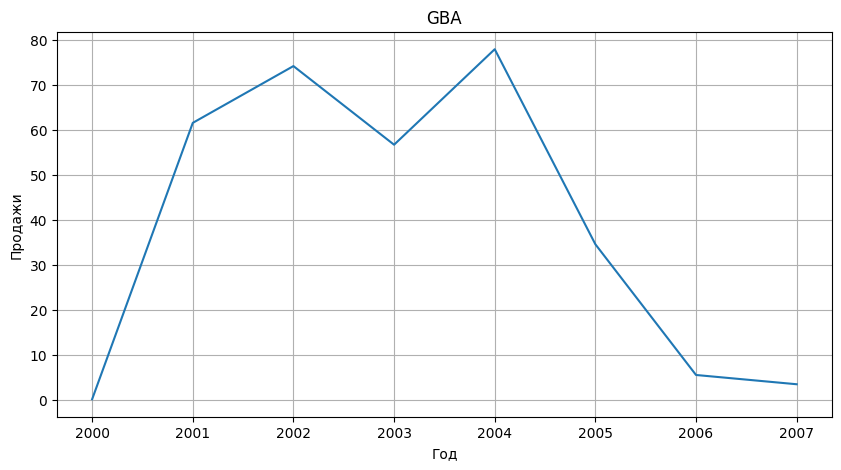

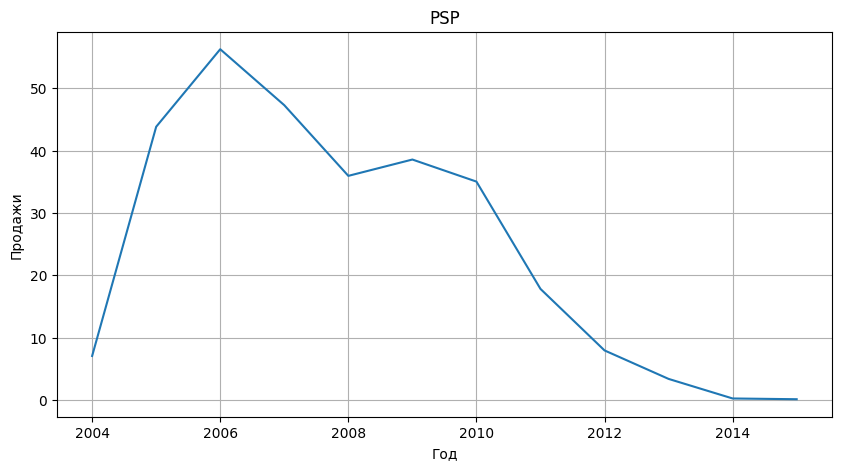

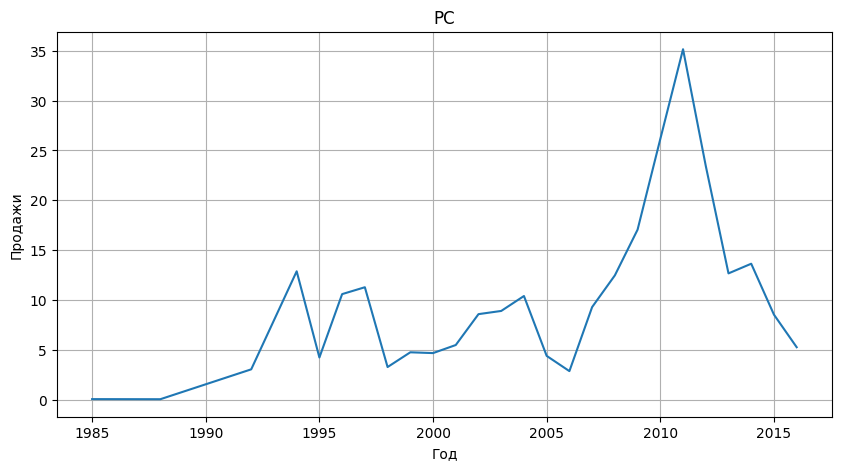

In [31]:
for i in platforms:
    sales_by_platform[sales_by_platform['platform'] == i]\
    .plot(
        grid=True, 
        y='world_sales',
        x='year_of_release',
        figsize=(10, 5), 
        legend=None)
    plt.title(i)
    plt.ylabel('Продажи')
    plt.xlabel('Год')
    plt.show()

**Вывод:** самые высокие продажи по платформам у PS2, после нее следудуют X360 и PS3. Новое поколение PlayStation, PS4, выпущенная в 2013 году уже находится на 7 месте, обгоняя персональный компьютер, который едва попал в десятку.

Период актуальности платформы составляет примерно 10 лет. Небольшой пик продаж происходит через 2 года после выпуска, и самый большой пик - через 4 года. Исключение: персональный компьютер, у консолей есть поколения, поэтому с появлением новой прошлые версие уходят с рынка, а вот компьютер "живет" намного дольше консолей, ведь в нем можно менять комплектующие по мере их устаревания. График продаж на ПК напоминает график общих продаж игр по годам, но с пиком в 2011 и резком провале.

Большинство платформ к 2016 году уже ушли с рынка, среди них: PS, PS2, DS, GBA, PSP.
Актуальность X360, PS3 и Wii падает, но их всё ещё стоит учитывать. Если учитывать тенденцию, то самый большой пик PS4 должен быть как раз в 2017 году. PC продолжает падать после 2013, но это довольно стабильная платформа, в том смысле, что на компьютерах играть прекратят не скоро.

<a id='period'></a>
### Актуальный период

Данные можно разделить на 4 периода: зарождение популяризации игр (примерно до 1993 года), стабтльный рост (с 1994 по 2005), пик популярности (2006-2011), упадок нынешнего времени (с 2012-по н.в.). Возьмем последний период - с 2012 года по настоящее время.

Создадим датафрейм, содержащий тольуо актуальный период.

In [32]:
period_games = games.query('year_of_release > 2011')
print(period_games['year_of_release'].min())
period_games.head()

2012


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,world_sales,critic_score,user_score,rating
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,21.05,97,82,M
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,16.27,97,81,M
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,14.63,<NA>,<NA>,NaN
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,14.60,<NA>,<NA>,NaN
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,13.79,83,53,M


Определим актуальные платформы.

In [33]:
platforms = period_games\
.pivot_table(
    index=['platform','year_of_release'], 
    values='world_sales', 
    aggfunc = 'sum'
)
platforms

world_sales
platform year_of_release             
3DS      2012                   51.76
         2013                   56.57
         2014                   43.76
         2015                   27.78
         2016                   15.14
DS       2012                   11.67
         2013                    1.54
PC       2012                   23.45
         2013                   12.66
         2014                   13.63
         2015                    8.52
         2016                    5.25
PS3      2012                  108.28
         2013                  113.25
         2014                   47.76
         2015                   16.82
         2016                    3.60
PS4      2013                   25.99
         2014                  100.00
         2015                  118.90
         2016                   69.25
PSP      2012                    7.95
         2013                    3.38
         2014                    0.24
         2015                    0.12
PSV      2012                   16.19
         2013                   10.59
         2014                   11.90
         2015                    6.25
         2016                    4.25
Wii      2012                   22.94
         2013                    8.59
         2014                    3.75
         2015                    1.14
         2016                    0.18
WiiU     2012                   17.56
         2013                   21.65
         2014                   22.03
         2015                   16.35
         2016                    4.60
X360     2012                  100.72
         2013                   88.58
         2014                   34.74
         2015                   11.96
         2016                    1.52
XOne     2013                   18.96
         2014                   54.07
         2015                   60.14
         2016                   26.15

Актуальными НЕ яаляются: DS, PS2, PSP, Wii, X360, PS3. Уберем их из актуальных данных.

In [34]:
platforms = ['3DS', 'PC', 'PS4', 'PSV', 'WiiU', 'XOne']
platforms

['3DS', 'PC', 'PS4', 'PSV', 'WiiU', 'XOne']

In [35]:
period_games = period_games[period_games['platform']\
                            .isin(platforms)]\
.reset_index()
period_games.head()

,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,world_sales,critic_score,user_score,rating
0,31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,14.63,<NA>,<NA>,NaN
1,33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,14.60,<NA>,<NA>,NaN
2,42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,12.62,97,83,M
3,47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,11.68,<NA>,<NA>,NaN
4,62,New Super Mario Bros. 2,3DS,2012,Platform,3.66,3.14,2.47,0.63,9.90,78,72,E


**Вывод:** актуальным был выбран период за 5 лет - с 2011 по 2016. Потенциально прибыльные платформы - 3DS, PC, PS4, PSV, WiiU, XOne.

<a id='boxplot'></a>
###  Диаграмма размаха по глобальным продажам игр по платформам

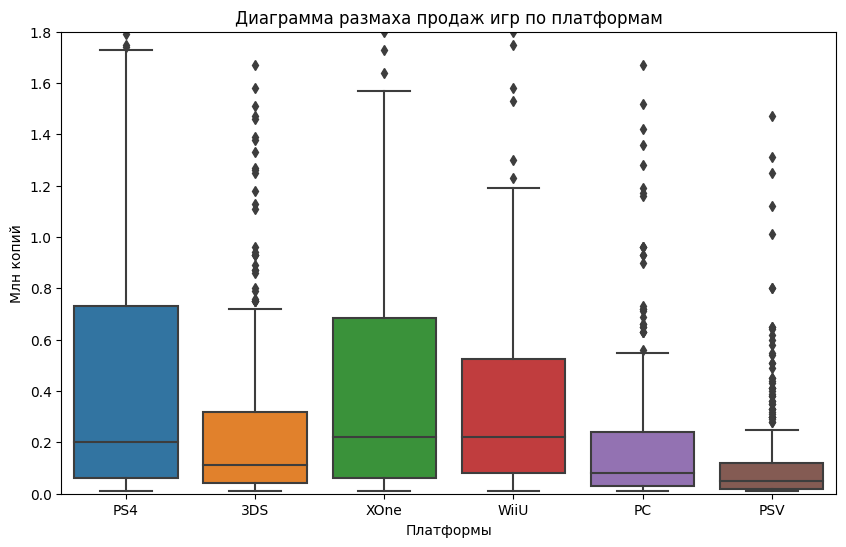

In [36]:
plt.figure(figsize=(10, 6))

sns.boxplot(
    data=period_games,
    x='platform', 
    y='world_sales', 
)\
.set(title='Диаграмма размаха продаж игр по платформам')

plt.ylim([0, 1.8])
plt.xlabel('Платформы')
plt.ylabel('Млн копий') 
plt.show()

In [37]:
period_games.groupby('platform')['world_sales'].describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
3DS,397.0,0.491209,1.385416,0.01,0.04,0.11,0.320,14.60
PC,255.0,0.249059,0.490149,0.01,0.03,0.08,0.240,5.14
PS4,392.0,0.801378,1.609456,0.01,0.06,0.20,0.730,14.63
PSV,411.0,0.119659,0.203011,0.01,0.02,0.05,0.120,1.96
WiiU,147.0,0.559116,1.058836,0.01,0.08,0.22,0.525,7.09
XOne,247.0,0.645020,1.036139,0.01,0.06,0.22,0.685,7.39


In [38]:
period_games.groupby('platform')['world_sales'].sum()

platform
3DS     195.01
PC       63.51
PS4     314.14
PSV      49.18
WiiU     82.19
XOne    159.32
Name: world_sales, dtype: float64

**Вывод:** за последние 4 года среди актуальных платформ (3DS, PC, PS4, PSV, WiiU, XOne) самые высокие продажи игр у PS4, после нее идут 3DS и XOne.

Самая маленькая волатильность (стандартное отклонение) - у PSV и персональных компьютеров, а самая большая у PS4. 

Самая высокая медиана у WiiU и XOne (0.22), а максимальное и среднее у PS4 (14.63 и 0.8). То есть самыми прибыльными платформами являются PS4, XOne и 3DS.

<a id='review'></a>
### Влияние отзывов на продажи

Посмотрим, как на продажи внутри одной популярной платформы, влияют оценки пользователей и критиков.

Создаем функцию для прорисовки графика.

In [39]:
def draw_scatter(df):
    pd.plotting.scatter_matrix(
        df,
        figsize=(7, 9),
    )
    plt.show()

#### PS4

In [40]:
corr_games = period_games.query('platform == "PS4"')
corr_games = corr_games\
.loc[:, ['world_sales', 'critic_score', 'user_score']]\
.reset_index(drop=True)
corr_games.head(3)

,world_sales,critic_score,user_score
0,14.63,<NA>,<NA>
1,12.62,97,83
2,8.58,82,43


              world_sales  critic_score  user_score
world_sales      1.000000      0.406568   -0.031957
critic_score     0.406568      1.000000    0.557654
user_score      -0.031957      0.557654    1.000000
Матрица диаграмм рассеяния для PS4


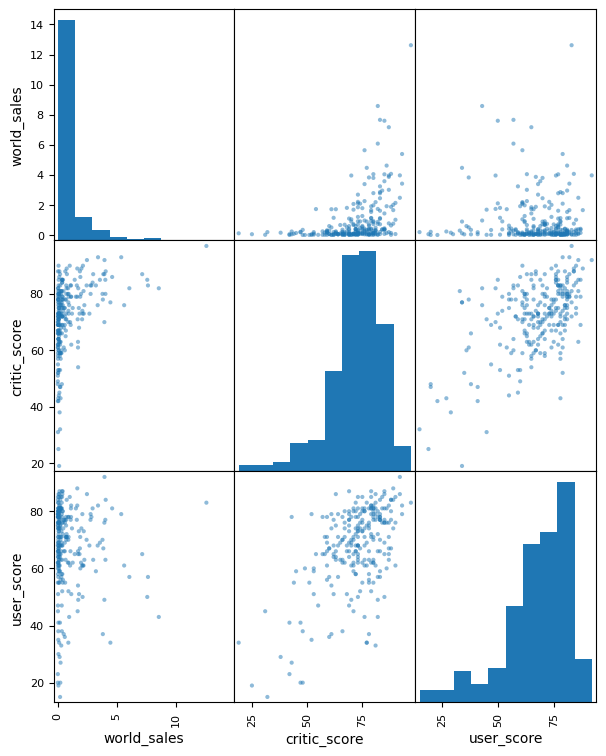

In [41]:
print(corr_games.corr())
print('Матрица диаграмм рассеяния для PS4')
draw_scatter(corr_games)

**Вывод:** для PS4 корреляция оценки критиков равна 0.41, а корреляция оценки пользователей равна -0.03. Это значит, что у PS4 оценка критиков имет влияние на продажи игр, но незначительное, а вот оценка пользователей практически не влияет на продажи.

#### 3DS

In [42]:
corr_games = period_games.query('platform == "3DS"')
corr_games = corr_games\
.loc[:, ['world_sales', 'critic_score', 'user_score']]\
.reset_index(drop=True)
corr_games.head(3)

,world_sales,critic_score,user_score
0,14.60,<NA>,<NA>
1,11.68,<NA>,<NA>
2,9.90,78,72


              world_sales  critic_score  user_score
world_sales      1.000000      0.320458    0.198150
critic_score     0.320458      1.000000    0.721517
user_score       0.198150      0.721517    1.000000
Матрица диаграмм рассеяния для 3DS


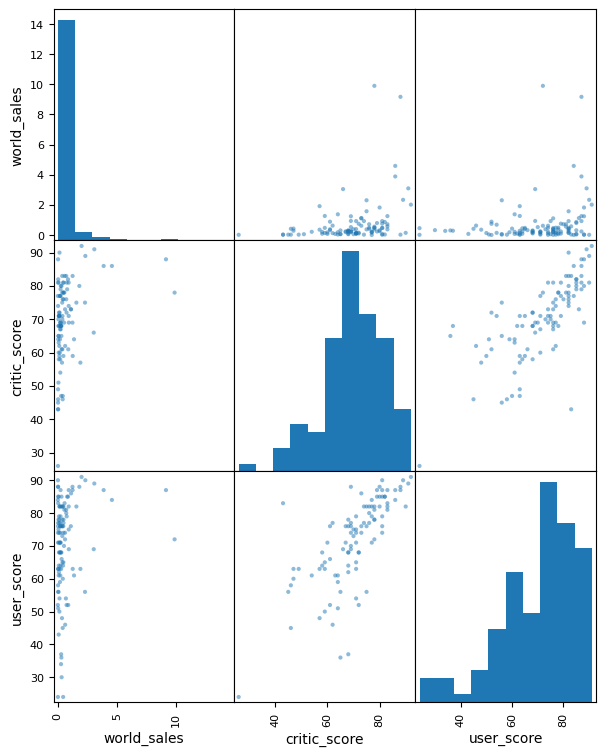

In [43]:
print(corr_games.corr())
print('Матрица диаграмм рассеяния для 3DS')
draw_scatter(corr_games)

**Вывод:** для 3DS корреляция оценки критиков равна 0.32, а корреляция оценки пользователей равна 0.20. Это значит, что у 3DS оценка критиков имет влияние больше влияния на продажи игр чем оценка пользователей. Влияние обеих незначительное.

#### XOne

In [44]:
corr_games = period_games.query('platform == "XOne"')
corr_games = corr_games\
.loc[:, ['world_sales', 'critic_score', 'user_score']]\
.reset_index(drop=True)
corr_games.head(3)

,world_sales,critic_score,user_score
0,7.39,<NA>,<NA>
1,5.47,97,79
2,5.26,81,54


              world_sales  critic_score  user_score
world_sales      1.000000      0.416998   -0.068925
critic_score     0.416998      1.000000    0.472462
user_score      -0.068925      0.472462    1.000000
Матрица диаграмм рассеяния для XOne


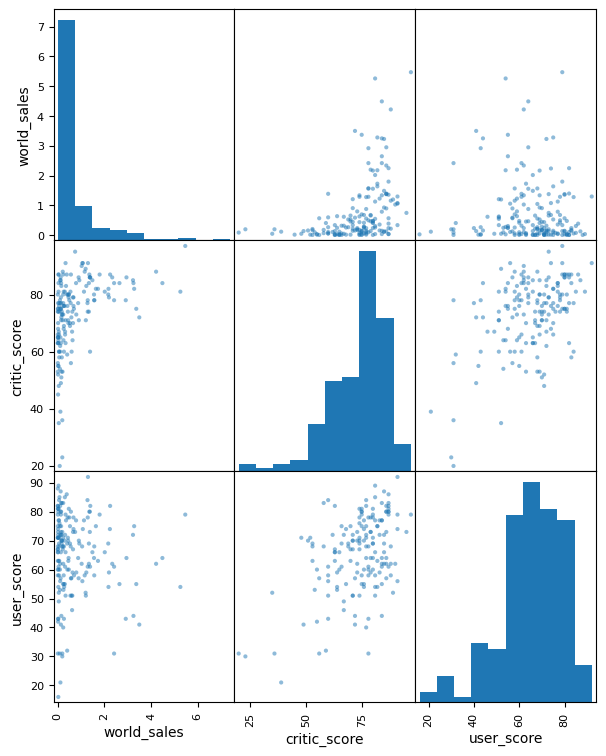

In [45]:
print(corr_games.corr())
print('Матрица диаграмм рассеяния для XOne')
draw_scatter(corr_games)

**Вывод:** для XOne корреляция оценки критиков равна 0.42, а корреляция оценки пользователей равна -0.07. Это значит, что у XOne оценка критиков имет влияние на продажи игр, но незначительное, а вот оценка пользователей практически не влияет на продажи.

#### PC

In [46]:
corr_games = period_games.query('platform == "PC"')
corr_games = corr_games\
.loc[:, ['world_sales', 'critic_score', 'user_score']]\
.reset_index(drop=True)
corr_games.head(3)

,world_sales,critic_score,user_score
0,5.14,88,40
1,3.05,70,39
2,2.30,90,79


              world_sales  critic_score  user_score
world_sales      1.000000      0.240570   -0.120339
critic_score     0.240570      1.000000    0.431879
user_score      -0.120339      0.431879    1.000000
Матрица диаграмм рассеяния для PC


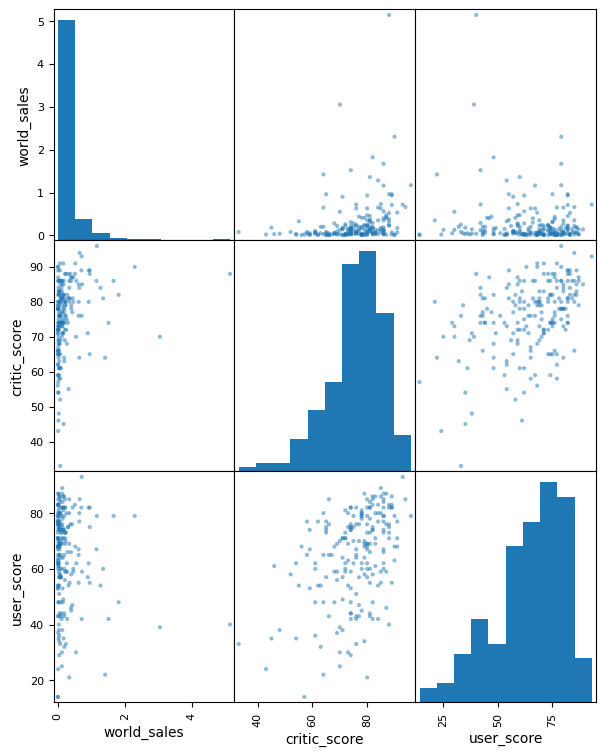

In [47]:
print(corr_games.corr())
print('Матрица диаграмм рассеяния для PC')
draw_scatter(corr_games)

**Вывод:** для PC корреляция оценки критиков равна 0.24, а корреляция оценки пользователей равна -0.12. Это значит, что у PC оценка критиков имет влияние больше влияния на продажи игр чем оценка пользователей. Влияние обеих незначительное.

#### WiiU

In [48]:
corr_games = period_games.query('platform == "WiiU"')
corr_games = corr_games\
.loc[:, ['world_sales', 'critic_score', 'user_score']]\
.reset_index(drop=True)
corr_games.head(3)

,world_sales,critic_score,user_score
0,7.09,88,91
1,5.23,84,81
2,4.87,<NA>,<NA>


              world_sales  critic_score  user_score
world_sales      1.000000       0.34838    0.400219
critic_score     0.348380       1.00000    0.770080
user_score       0.400219       0.77008    1.000000
Матрица диаграмм рассеяния для WiiU


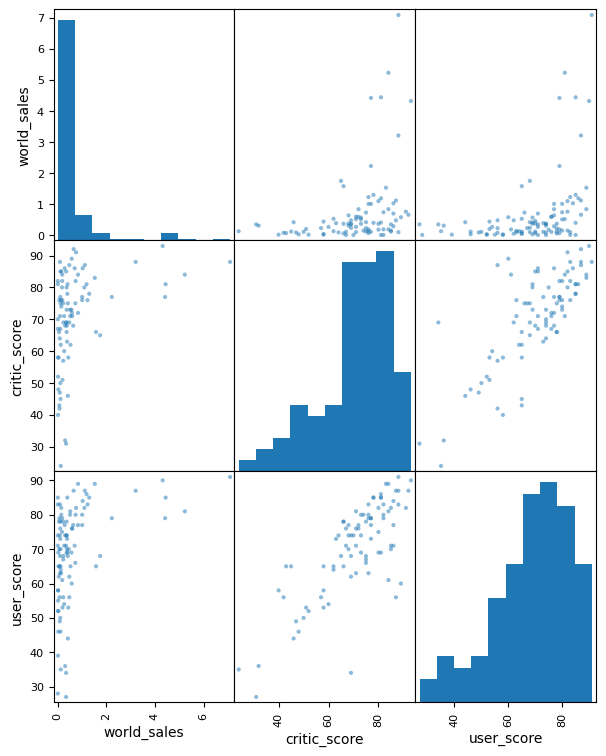

In [49]:
print(corr_games.corr())
print('Матрица диаграмм рассеяния для WiiU')
draw_scatter(corr_games)

**Вывод:** для WiiU корреляция оценки критиков равна 0.35, а корреляция оценки пользователей равна 0.40. Это значит, что у WiiU оценка критиков имет влияние меньше влияния на продажи игр чем оценка пользователей.

#### PSV

In [50]:
corr_games = period_games.query('platform == "PSV"')
corr_games = corr_games\
.loc[:, ['world_sales', 'critic_score', 'user_score']]\
.reset_index(drop=True)
corr_games.head(3)

,world_sales,critic_score,user_score
0,1.96,<NA>,<NA>
1,1.47,33,48
2,1.31,70,72


              world_sales  critic_score  user_score
world_sales      1.000000      0.094488   -0.004339
critic_score     0.094488      1.000000    0.699199
user_score      -0.004339      0.699199    1.000000
Матрица диаграмм рассеяния для PSV


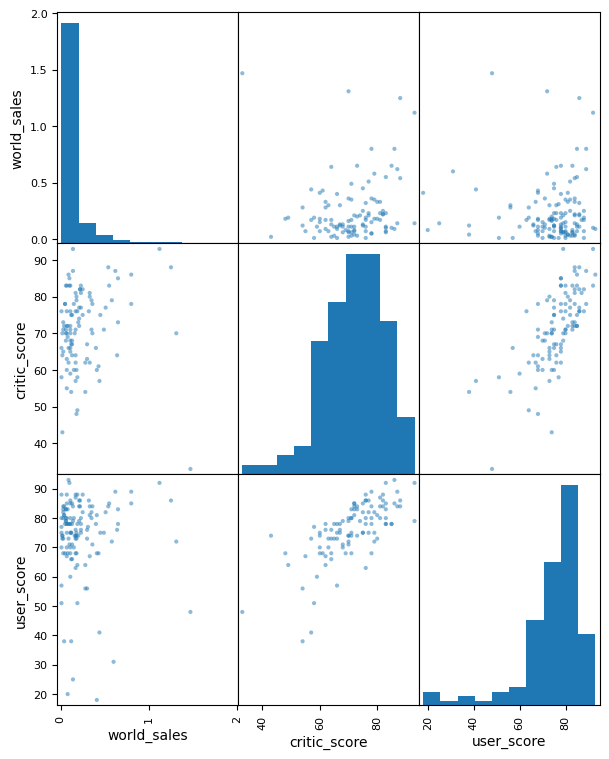

In [51]:
print(corr_games.corr())
print('Матрица диаграмм рассеяния для PSV')
draw_scatter(corr_games)

**Вывод:** для PSV корреляция оценки критиков равна 0.09, а корреляция оценки пользователей равна -0.004. Это значит, что у PSV оценки критиков и пользователей не вляют на продажи.

**Общий вывод:** 
- из популярных платформ выделяется PSV с очень низкой корреляцией по обеим оценкам (0.09 для оценки критиков и -0.004 для пользовательской), что значит, они не влияют на продажи. Для всех популярных платформ оценка критиков имеет влияние на продажи, но небольшое. Самый высокий показатель у XOne - 0.42, самый маленький у ПК - 0.24. Оценка пользователей почти не имеет влияния на продажи. Самый высокий показатель у WiiU (0.4) и 3DS (0.20), самый маленький у PS4, равный -0.03;
- чаще всего к оценкам критиков прислушиваются пользователи XOne и PS4, а вот к оценкам пользователей чаще прислушиваются владельцы WiiU;
- оценки критиков и тем более пользователей имеют незначительное влияние на продажи игр среди платформ;
- можно сказать, что в общем пользователи чаще доверяют оценкам критиков, чем оценкам соигроков.

<a id='top_genre'></a>
### Распределение игр по жанрам

Посмотрим на общее распределение игр по жанрам.

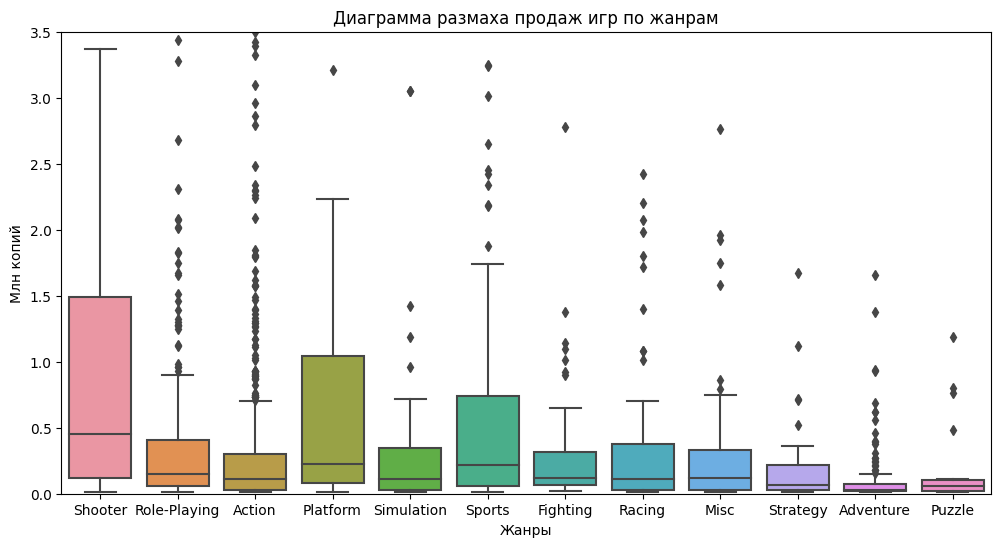

In [52]:
plt.figure(figsize=(12, 6))

sns.boxplot(
    data=period_games,
    x='genre', 
    y='world_sales', 
)\
.set(title='Диаграмма размаха продаж игр по жанрам')

plt.ylim([0, 3.5])
plt.xlabel('Жанры')
plt.ylabel('Млн копий') 
plt.show()

In [53]:
top_genre = period_games\
.pivot_table(
    index='genre',
    values='world_sales',
    aggfunc=['sum', 'count', 'mean', 'median']
)
top_genre.columns = ['sold_sum', 
                     'games_count', 
                     'mean_sales', 
                     'meadian_sales']
top_genre = top_genre.reset_index()
top_genre

,genre,sold_sum,games_count,mean_sales,meadian_sales
0,Action,228.69,665,0.343895,0.110
1,Adventure,18.15,187,0.097059,0.030
2,Fighting,28.16,56,0.502857,0.120
3,Misc,42.58,129,0.330078,0.120
4,Platform,51.66,64,0.807188,0.225
5,Puzzle,4.09,22,0.185909,0.055
6,Racing,33.52,72,0.465556,0.110
7,Role-Playing,147.43,262,0.562710,0.150
8,Shooter,171.65,137,1.252920,0.450
9,Simulation,31.32,57,0.549474,0.110


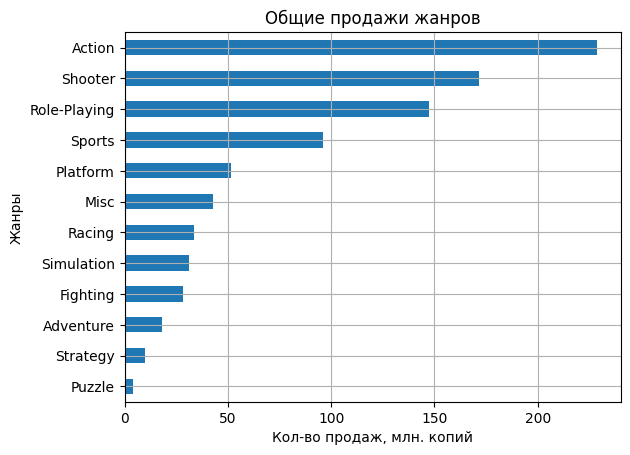

In [54]:
top_genre\
.sort_values(by='sold_sum')\
.plot(
    kind='barh',
    x='genre',
    y='sold_sum',
    grid=True,
    title='Общие продажи жанров',
    legend=None
);
plt.xlabel('Кол-во продаж, млн. копий')
plt.ylabel('Жанры');

**Вывод:**
- **Количество игр в жанре:** чаще всего выпускают игры в жанре экшн - 665 игр за 4 года. Также в тройку лидеров входят РПГ и приключение. Меньше всего за 4 года выпустили игр в жанре пазлов - 22 штуки, а также файтингов и стратегий.
- **Общие продажи жанра:** тройка лидеров - экшн, шутер и рпг (всего 228.69, 171.65 и 147.43 млн.проданных копий). А вот наименее прибыльными жанрами являются пазлы, стратегии и приключения (4.09, 9.89 и 18.15 млн.проданных копий).
- Самые высокие продажи у шутеров, платформеров и спорта (медиана: 0.45, 0.22 и 0.22 млн.копий). Самые низкие продажи у приключений, пазлов и стратегий (медиана: 0.03, 0.06 и 0.07).

Очевидно, пользователям больше нравятся активные, сюжетные игры и/или игры на реакцию: шутер, платформер, спорт, также хорошо продается рпг и файтинги. Наимение популярными жанрами среди пользователей являются пазлы, стратегия и приключение, то есть игры, включающие стратегическое планирование над действиями.

**Общий вывод:** в результате исследовательского анализа данных были изучены данные и получены следующие выводы:

- Построен график количества выпущенных игр за каждый год. На графике видно, как количество выпущенных игр, начиная с 90-х продолжает расти, но после пика 2008-2009 годов показатели резко падают. Для дальшейшего анализа можно не учитывать данные раннее 1993 года, так как в эти годы слишком мало релизов. 
    - 90-е годы ознаменованы заметными инновациями в компьютерных играх: переход от растровой графики к полностью полигональному 3D, снижение популярности аркадных игр и появление нескольких новых жанров. Портативные игры становятся все более популярными. 
    - 2000-2010-е продемонстрировали инновации как среди консолей, так и ПК, а также растущую конкуренцию на рынке портативных игровых систем. Влияние большей доступности Интернета привело к новым изменениям игрового процесса, изменениям в игровом оборудовании и появлению онлайн-сервисов для игровых консолей. В Китае игровые консоли были запрещены в июне 2000 года (снят в 2015). Это привело к взрыву популярности компьютерных игр, особенно MMO. После кризиса 2007 года большие корпорации пересмотрели стратегию и стали вкладывать основные ресурсы в большие и высоко-бюджетные тайтлы, способные выдержать конкуренцию, а все остальные ресурсы перенаправить в сектор мобильных и онлайн-игр.

- Посчитаны **общие продажи по игровым платформам и построены графики.**
    - самые высокие продажи по платформам у PS2, после нее следудуют X360 и PS3. Новое поколение PlayStation, PS4, выпущенная в 2013 году уже находится на 7 месте, обгоняя персональный компьютер, который едва попал в десятку.
    - период актуальности платформы составляет примерно 10 лет. Небольшой пик продаж происходит через 2 года после выпуска, и самый большой пик - через 4 года. Исключение: персональный компьютер, у консолей есть поколения, поэтому с появлением новой прошлые версие уходят с рынка, а вот компьютер "живет" намного дольше консолей, ведь в нем можно менять комплектующие по мере их устаревания.
    - большинство платформ к 2016 году уже ушли с рынка, среди них: PS, PS2, DS, GBA, PSP. Актуальность X360, PS3 и Wii падает, но их всё ещё стоит учитывать. Если учитывать тенденцию, то самый большой пик PS4 должен быть как раз в 2017 году. PC продолжает падать после 2013, но это довольно стабильная платформа.

- Выбран **актуальный период.**
    - Данные можно разделить на 4 периода: зарождение популяризации игр (примерно до 1993 года), стабтльный рост (с 1994 по 2005), пик популярности (2006-2011), упадок нынешнего времени (с 2012-по н.в.). Брать данные раньше 2012 не имело смысла - многие платформы больше не интересны потребителю.
    
Актуальным был выбран период за 4 года - с 2012 по 2016. Потенциально прибыльные платформы - 3DS, PC, PS4, PSV, WiiU, XOne.

- Построены **диаграммы размаха по глобальным продажам игр по популярным платформам.**
    - за последние 4 года среди актуальных платформ (3DS, PC, PS4, PSV, WiiU, XOne) самые высокие продажи игр у PS4, после нее идут 3DS и XOne.

- самая маленькая волатильность (стандартное отклонение) - у PSV и персональных компьютеров, а самая большая у PS4. Самая высокая медиана у WiiU и XOne (0.22), а максимальное и среднее у PS4 (14.63 и 0.8). 

Самыми прибыльными платформами являются PS4, XOne и 3DS.

- Изучено **влияние отзывов на продажи.**
    - из популярных платформ выделяется PSV с очень низкой корреляцией по обеим оценкам (0.09 для оценки критиков и -0.004 для пользовательской), что значит, они не влияют на продажи. Для всех популярных платформ оценка критиков имеет влияние на продажи, но небольшое. Самый высокий показатель у XOne - 0.42, самый маленький у ПК - 0.24. Оценка пользователей почти не имеет влияния на продажи. Самый высокий показатель у WiiU (0.4) и 3DS (0.20), самый маленький у PS4, равный -0.03;
- чаще всего к оценкам критиков прислушиваются пользователи XOne и PS4, а вот к оценкам пользователей чаще прислушиваются владельцы WiiU;

Оценки критиков и тем более пользователей имеют незначительное влияние на продажи игр среди платформ. Можно сказать, что в общем пользователи чаще доверяют оценкам критиков, чем оценкам соигроков.

- **Изучено распределение игр по жанрам.**
    - **Количество игр в жанре:** чаще всего выпускают игры в жанре экшн - 665 игр за 4 года. Также в тройку лидеров входят РПГ и приключение. Меньше всего за 4 года выпустили игр в жанре пазлов - 22 штуки, а также файтингов и стратегий.
    - **Общие продажи жанра:** тройка лидеров - экшн, шутер и рпг (всего 228.69, 171.65 и 147.43 млн.проданных копий). А вот наименее прибыльными жанрами являются пазлы, стратегии и приключения (4.09, 9.89 и 18.15 млн.проданных копий).
    - Самые высокие продажи у шутеров, платформеров и спорта (медиана: 0.45, 0.22 и 0.22 млн.копий). Самые низкие продажи у приключений, пазлов и стратегий (медиана: 0.03, 0.06 и 0.07).

Очевидно, пользователям больше нравятся активные, сюжетные игры и/или игры на реакцию: шутер, платформер, спорт, также хорошо продается рпг и файтинги. Наимение популярными жанрами среди пользователей являются пазлы, стратегия и приключение, то есть игры, включающие стратегическое планирование над действиями.

<a id='port'></a>
## Портрет пользователя каждого региона

<a id=topplat></a>
### Самые популярные платформы (топ-5)

Подготовим данные.

In [55]:
eu_plat = games.query('year_of_release > 2011')
na_plat = games.query('year_of_release > 2011')
jp_plat = games.query('year_of_release > 2011')

#### Европа

In [56]:
eu_platforms = eu_plat\
.pivot_table( 
    index='platform',
    values='eu_sales',
    aggfunc='sum'
)\
.sort_values(by='eu_sales', ascending=False)\
.head()

In [57]:
eu_platforms

,eu_sales
platform,
PS4,141.09
PS3,107.27
X360,74.89
XOne,51.59
3DS,42.83


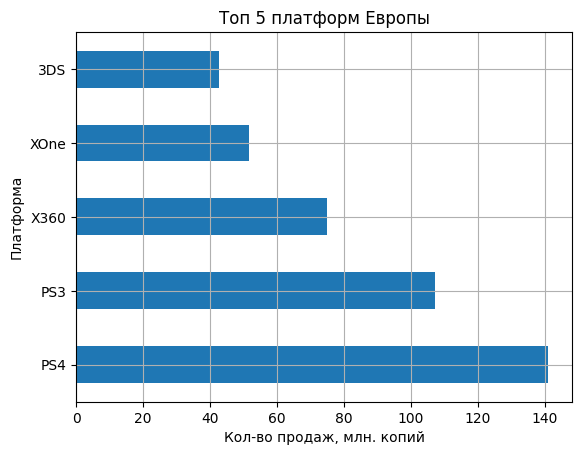

In [58]:
eu_platforms.plot(
    kind='barh', 
    grid=True,
    title='Топ 5 платформ Европы',
    legend=None
);
plt.xlabel('Кол-во продаж, млн. копий')
plt.ylabel('Платформа');

**Вывод:** самые популярные платформы в Европе - PS4, PS3, X360, XOne и 3DS.

#### Северная Америка

In [59]:
na_platforms = na_plat\
.pivot_table( 
    index='platform',
    values='na_sales',
    aggfunc='sum'
)\
.sort_values(by='na_sales', ascending=False)\
.head()

In [60]:
na_platforms

,na_sales
platform,
X360,140.57
PS4,108.74
PS3,103.74
XOne,93.12
3DS,55.49


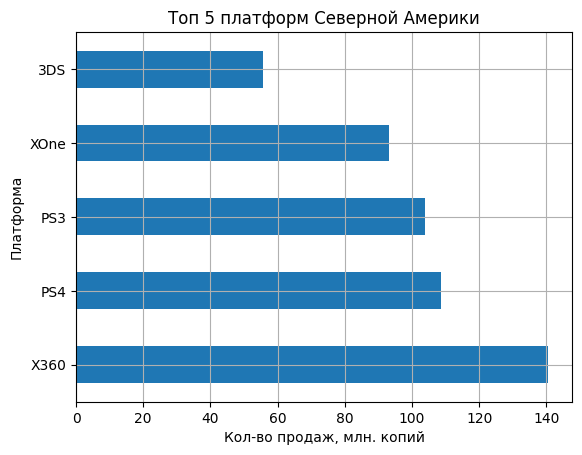

In [61]:
na_platforms.plot(
    kind='barh', 
    grid=True,
    title='Топ 5 платформ Северной Америки',
    legend=None
);
plt.xlabel('Кол-во продаж, млн. копий')
plt.ylabel('Платформа');

**Вывод:** самые популярные платформы в Северной Америке - X360, PS4, PS3, XOne, 3DS.

#### Япония

In [62]:
jp_platforms = jp_plat\
.pivot_table( 
    index='platform',
    values='jp_sales',
    aggfunc='sum'
)\
.sort_values(by='jp_sales', ascending=False)\
.head()

In [63]:
jp_platforms

,jp_sales
platform,
3DS,87.79
PS3,35.29
PSV,21.04
PS4,15.96
WiiU,13.01


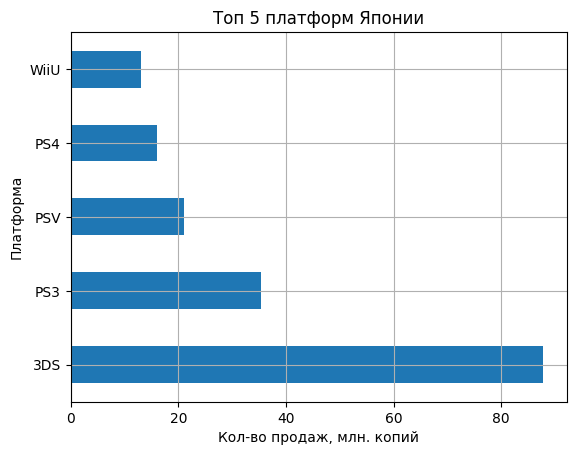

In [64]:
jp_platforms.plot(
    kind='barh', 
    grid=True,
    title='Топ 5 платформ Японии',
    legend=None
);
plt.xlabel('Кол-во продаж, млн. копий')
plt.ylabel('Платформа');

**Вывод:** самые популярные платформы в Японии - 3DS, PS3, PSV, PS4, WiiU.

**Общий вывод:** 
По диаграммам видно, что игровые платформы в родных регионах преобладают: 
- в Японии топ 5 платформ с большим отрывом возглавляет Nintendo, а именно 3DS. Далее идут PS3, PSV, PS4, WiiU. 
- в Северной Америке топ возглавляет X360 от Microsoft, далее идет PS4, PS3 и XOne, а потом 3DS.
- в Европе самая популярная платформа - PS4, следом идут PS3, X360, XOne и 3DS.

В Японии более популярны портативные платформы, в местном рынке доменирует Nintendo. 
В Северной Америке популярен местный X360 от Microsoft, а также в топ входит XOne.
А вот в европейском рынке первые две лидирующие позиции занимают PS4 и PS3 от Sony. 

<a id=topgen></a>
### Самые популярные жанры (топ-5)

#### Европа

In [65]:
eu_platforms = eu_plat\
.pivot_table( 
    index='genre',
    values='eu_sales',
    aggfunc='sum'
)\
.sort_values(by='eu_sales', ascending=False)\
.head()

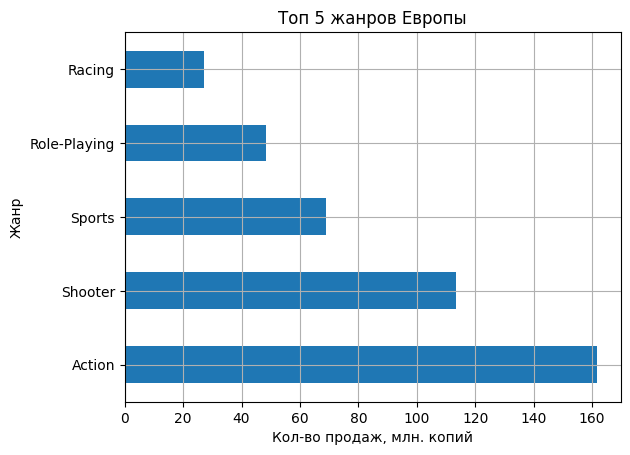

In [66]:
eu_platforms.plot(
    kind='barh',  
    grid=True,
    title='Топ 5 жанров Европы',
    legend=None
);
plt.xlabel('Кол-во продаж, млн. копий')
plt.ylabel('Жанр');

**Вывод:** самые популярные жанры в Европе - экшн, шутер, спорт, рпг, гонки.

#### Северная Америка

In [67]:
na_platforms = na_plat\
.pivot_table( 
    index='genre',
    values='na_sales',
    aggfunc='sum'
)\
.sort_values(by='na_sales', ascending=False)\
.head()

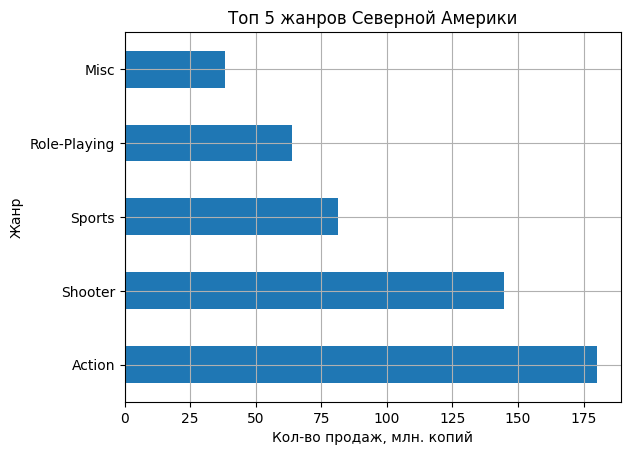

In [68]:
na_platforms.plot(
    kind='barh', 
    grid=True,
    title='Топ 5 жанров Северной Америки',
    legend=None
);
plt.xlabel('Кол-во продаж, млн. копий')
plt.ylabel('Жанр');

**Вывод:** самые популярные жанры в Северной Америке - экшн, шутер, спорт, рпг, misc.

#### Япония

In [69]:
jp_platforms = jp_plat\
.pivot_table( 
    index='genre',
    values='jp_sales',
    aggfunc='sum'
)\
.sort_values(by='jp_sales', ascending=False)\
.head()

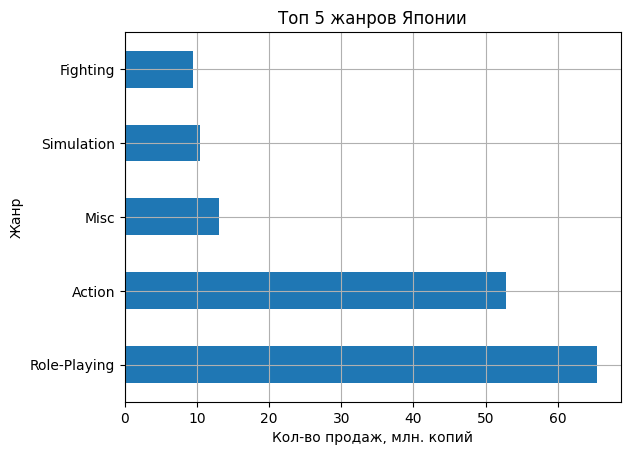

In [70]:
jp_platforms.plot(
    kind='barh', 
    grid=True,
    title='Топ 5 жанров Японии',
    legend=None
);
plt.xlabel('Кол-во продаж, млн. копий')
plt.ylabel('Жанр');

**Вывод:** самые популярные жанры в Японии - рпг и экшн, а также misc, симулятор, файтинг.

<a id='rat'></a>
### Влияние рейтинга на продаже в регионе

#### Европа

In [71]:
eu_platforms = eu_plat\
.pivot_table( 
    index='rating',
    values='eu_sales',
    aggfunc='sum'
)\
.sort_values(by='eu_sales', ascending=False)\
.head(4)

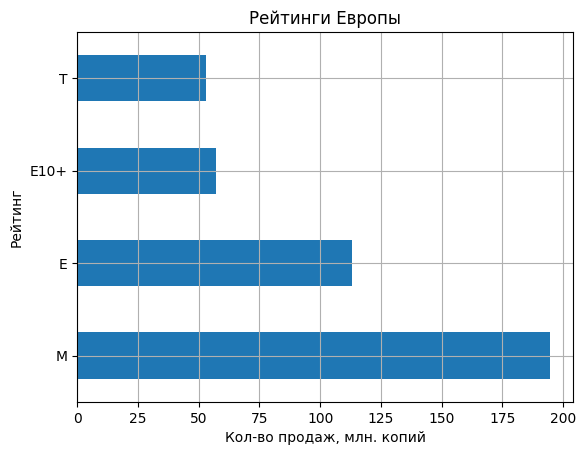

In [72]:
eu_platforms.plot(
    kind='barh',  
    grid=True,
    title='Рейтинги Европы',
    legend=None
);
plt.xlabel('Кол-во продаж, млн. копий')
plt.ylabel('Рейтинг');

**Вывод:** основаной рейтинг в Европе - старше 17 (M) и для всех возрастов (E).

#### Северная Америка

In [73]:
na_platforms = na_plat\
.pivot_table( 
    index='rating',
    values='na_sales',
    aggfunc='sum'
)\
.sort_values(by='na_sales', ascending=False)\
.head(4)

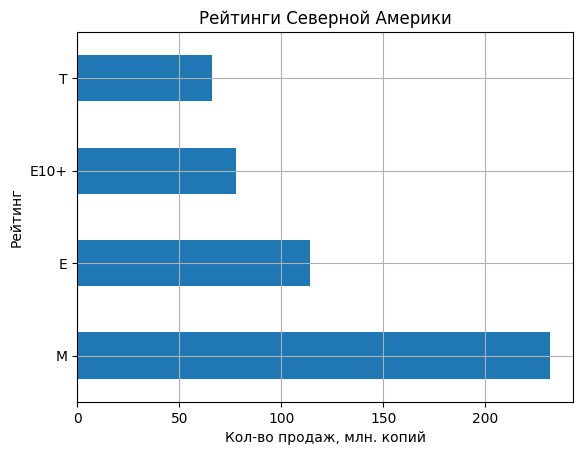

In [74]:
na_platforms.plot(
    kind='barh', 
    grid=True,
    title='Рейтинги Северной Америки',
    legend=None
);
plt.xlabel('Кол-во продаж, млн. копий')
plt.ylabel('Рейтинг');

**Вывод:** основной рейтинг в Северной Америке - старше 17 (M).

#### Япония

In [75]:
jp_platforms = jp_plat\
.pivot_table( 
    index='rating',
    values='jp_sales',
    aggfunc='sum'
)\
.sort_values(by='jp_sales', ascending=False)\
.head(4)

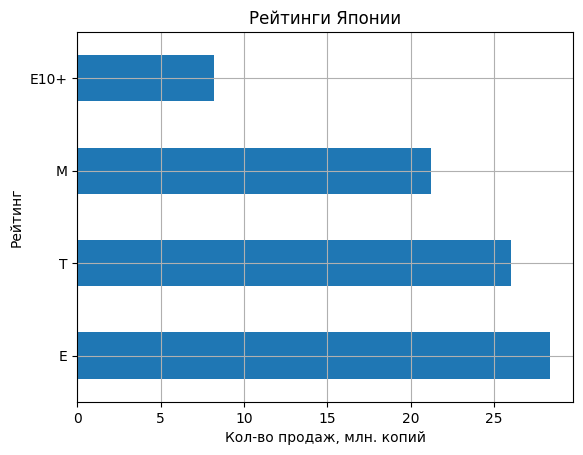

In [76]:
jp_platforms.plot(
    kind='barh', 
    grid=True,
    title='Рейтинги Японии',
    legend=None
);
plt.xlabel('Кол-во продаж, млн. копий')
plt.ylabel('Рейтинг');

**Вывод:** основаные рейтинги в Японии - для всех (E), подростки 13+ (T) и старше 17 (M).

**Общий вывод:** за последние четыре года мы можем наблюдать следующие данные.

Европа
- топ игровых платформ: PS4, PS3, X360, XOne, DS
- топ жанров: экшн, шутер, спорт, рпг, гонки
- топ рейтингов: старше 17 (M), для всех возрастов (E)

Северная Америка
- топ игровых платформ: X360, PS4, PS3, XOne, 3DS
- топ жанров: экшн, шутер, спорт, рпг, misc
- топ рейтингов: старше 17 (M)

Япония
- топ игровых платформ: 3DS, PS3, PSV, PS4, WiiU
- топ жанров: рпг, экшн, misc, симулятор, файтинг
- топ рейтингов: для всех возрастов (E), старше 13 (T), старше 17 (M)

Портрет среднестатестичекого пользователя по регионам

Европейский пользователь: старше 17, играет в экшн на PS4 или PS3
Северо-американский: старше 17, играет в экшн, шутер на X360 или PS4
Японский: ребенок (семейные игры), подросток или старше 17, играет в рпг, экшн на 3DS

<a id='hyp'></a>
## Гипотезы

Для проверки гипотез  о равенстве среднего двух генеральных совокупностей по взятым из них выборкам используется критерий Стьюдента, в python для этого есть метод `scipy.stats.ttest_ind()`. 
- Т.к. мы не уверены, равны ли дисперсии, задается параметр `equal_var=False`, чтобы метод не считал дисперсии равными. 
- Нулевую гипотезу часто формулируют так, чтобы использовать знак равенства, значит, альтернативная гипотеза будет проверять являются ли значения не равными - не важно в какую сторону, то есть гипотеза двусторонняя - можно не передавать параметру `alternative` значения, т.к. он по умолчанию равен `two-sided`.

### Гипотеза 1

Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Сформулируем гипотезы

- **Нулевая гипотеза:** средние пользовательские оценки платформ Xbox One и PC **равны**
- **Альтернаятивная гипотеза:** средние пользовательские оценки платформ Xbox One и PC **не** равны

Подготавливаем данные.

In [77]:
xone_score = period_games[period_games['platform'] == 'XOne']
pc_score = period_games[period_games['platform'] == 'PC']

xone_score = xone_score.dropna(axis=0, how='any', subset=['user_score'])
pc_score = pc_score.dropna(axis=0, how='any', subset=['user_score'])

In [78]:
print(f'Средняя пользовательская оценка на XOne:',\
      round(xone_score['user_score'].mean(), 2))
print(f'Средняя пользовательская оценка на PC:',\
      round(pc_score['user_score'].mean(), 2))

# выбранный уроваень статистической значимости
alpha = .01

results = st.ttest_ind(
    xone_score['user_score'],
    pc_score['user_score'],
    equal_var=False
)

print('p-value:', results.pvalue)

# вывод о нулевой гипотезе
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

Средняя пользовательская оценка на XOne: 65.21
Средняя пользовательская оценка на PC: 64.45
p-value: 0.6206366351489753
Не получилось отвергнуть нулевую гипотезу


**Вывод:** нулвая гипотеза о том, что средние пользовательские оценки платформ Xbox One и PC одинаковы - не может быть отвергнута. 
Значение p-value показывает: вероятность получить равные средние значения пользовательских оценок платформ Xbox One и PC составляет почти 62%

### Гипотеза 2

Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Сформулируем гипотезы

- **Нулевая гипотеза:** средние пользовательские оценки жанров Action и Sports **равны**
- **Альтернаятивная гипотеза:** средние пользовательские оценки жанров Action и Sports **не** равны

Подготавливаем данные.

In [79]:
action_score = period_games[period_games['genre'] == 'Action']
sports_score = period_games[period_games['genre'] == 'Sports']

action_score = action_score.dropna(axis=0, how='any', subset=['user_score'])
sports_score = sports_score.dropna(axis=0, how='any', subset=['user_score'])

In [81]:
print(f'Средняя пользовательская оценка Action:',\
      round(action_score['user_score'].mean(), 2))
print(f'Средняя пользовательская оценка Sports:',\
      round(sports_score['user_score'].mean(), 2))

# выбранный уроваень статистической значимости
alpha = .01

results = st.ttest_ind(
    action_score['user_score'].dropna(),
    sports_score['user_score'].dropna(),
    equal_var=False
)

print('p-значение:', results.pvalue)

# вывод о нулевой гипотезе
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

Средняя пользовательская оценка Action: 68.91
Средняя пользовательская оценка Sports: 56.59
p-значение: 1.6944890481938334e-11
Отвергаем нулевую гипотезу


**Вывод:** нулвая гипотеза о том, что средние пользовательские оценки жанров Action и Sports одинаковы - отвергнута. И не отвергнута альтернативная гипотеза о разности средних пользовательских оценок жанров Action и Sports.
Значение p-value показывает, что вероятность получить одинаковые средние оценки у данных двух жанров очень низкая.

<a id='fin'></a>
## Общие выводы

В результате выполнения анализа данных продаж компьютерных игр по 2016 год включительно была проведена **предобработка данных:**
- изначально датафрейм содержал 16 715 записей;
- названия столбцов приведены к нижнему регистру;
- обработаны пропуски в столбцах;
    - пропуски в столбце name удалены, т.к. их невозможно заполнить самостоятельно.
    - в столбце `year_of_release` некоторые пропущенные значения заменены годом, найденным в релизах этой же игры на другой платформе. Оставшиеся пропуски удалены.
    - `critic_score`, `user_score содержат`содержат много попусков, но их нельзя заменить медианным или средним значением, слишком много влияет на оценку каждой отдельной игры. Пропуски в данных столбцах не тронуты.
    - в `rating` пропуски также не тронуты, их тоже невозможно заменить медианным или средним значением.

Пропуски в столбцах с оценками от критиков и игроков могли появится из-за отсутсвия или слишком малого количества данных по позиции, пропущенные значения в рейтинге могут встречаться в играх, которые появились до ESRB, или в играх, где рейтинг по той или иной причине отсутствует. Отсутсвие данных в названии, жанре и годе релиза, скорее всего, связаны с техническими ошибками при записи, получении и тд. данных.

- преобразованы типы данных; 
    - `year_of_release` из `float` в `int`, т.к. год - целое число;
    - `critic_score` - из `float` в `int`, т.к. сто-балльная система представлена целым числом;
    - `user_score` - из `object` в `float` в `int`, чтобы дальше было проще сравнивать данные, пользовательская оценка приведена к целому значению в сто-балльной системе.
- создан столбец `world_sales`, содержащий суммарные продажи каждой игры во всех регионах;
- удалены строки без продаж, оценок и рейтинга.
- дубликаты отсутствуют.

В ходе **исследовательского анализа данных** были изучены данные и получены следующие выводы:
- Построен график количества выпущенных игр за каждый год. На графике видно, как количество выпущенных игр, начиная с 90-х продолжает расти, но после пика 2008-2009 годов показатели резко падают. Для дальшейшего анализа можно не учитывать данные раннее 1993 года, так как в эти годы слишком мало релизов. 
    - 90-е годы ознаменованы заметными инновациями в компьютерных играх: переход от растровой графики к полностью полигональному 3D, снижение популярности аркадных игр и появление нескольких новых жанров. Портативные игры становятся все более популярными. 
    - 2000-2010-е продемонстрировали инновации как среди консолей, так и ПК, а также растущую конкуренцию на рынке портативных игровых систем. Влияние большей доступности Интернета привело к новым изменениям игрового процесса, изменениям в игровом оборудовании и появлению онлайн-сервисов для игровых консолей. В Китае игровые консоли были запрещены в июне 2000 года (снят в 2015). Это привело к взрыву популярности компьютерных игр, особенно MMO. После кризиса 2007 года большие корпорации пересмотрели стратегию и стали вкладывать основные ресурсы в большие и высоко-бюджетные тайтлы, способные выдержать конкуренцию, а все остальные ресурсы перенаправить в сектор мобильных и онлайн-игр.
    
- Посчитаны **общие продажи по игровым платформам** и построены графики.
    - самые высокие продажи по платформам у PS2, после нее следудуют X360 и PS3. Новое поколение PlayStation, PS4, выпущенная в 2013 году уже находится на 7 месте, обгоняя персональный компьютер, который едва попал в десятку.
    - период актуальности платформы составляет примерно 10 лет. Небольшой пик продаж происходит через 2 года после выпуска, и самый большой пик - через 4 года. Исключение: персональный компьютер, у консолей есть поколения, поэтому с появлением новой прошлые версие уходят с рынка, а вот компьютер "живет" намного дольше консолей, ведь в нем можно менять комплектующие по мере их устаревания.
    - большинство платформ к 2016 году уже ушли с рынка, среди них: PS, PS2, DS, GBA, PSP. Актуальность X360, PS3 и Wii падает, но убирать их не стоит. Если учитывать тенденцию, то самый большой пик PS4 должен быть как раз в 2017 году. PC продолжает падать после 2013, но это довольно стабильная платформа.
    
- Выбран **актуальный период:** период за 4 года - с 2012 по 2016. Потенциально прибыльные платформы - 3DS, PC, PS4, PSV, WiiU, XOne.

- Построены **диаграммы размаха по глобальным продажам игр по популярным платформам.**
    - за последние 4 года среди актуальных платформ (3DS, PC, PS4, PSV, WiiU, XOne) самые высокие продажи игр у PS4, после нее идут 3DS и XOne.

    - самая маленькая волатильность (стандартное отклонение) - у PSV и персональных компьютеров, а самая большая у PS4. Самая высокая медиана у WiiU и XOne (0.22), а максимальное и среднее у PS4 (14.63 и 0.8). 

Самыми прибыльными платформами являются PS4, XOne и 3DS.

- Изучено **влияние отзывов на продажи**.
    - из популярных платформ выделяется PSV с очень низкой корреляцией по обеим оценкам (0.09 для оценки критиков и -0.004 для пользовательской), что значит, они не влияют на продажи. Для всех популярных платформ оценка критиков имеет влияние на продажи, но небольшое. Самый высокий показатель у XOne - 0.42, самый маленький у ПК - 0.24. Оценка пользователей почти не имеет влияния на продажи. Самый высокий показатель у WiiU (0.4) и 3DS (0.20), самый маленький у PS4, равный -0.03;
    - чаще всего к оценкам критиков прислушиваются пользователи XOne и PS4, а вот к оценкам пользователей чаще прислушиваются владельцы WiiU;

Оценки критиков и тем более пользователей имеют незначительное влияние на продажи игр среди платформ. Можно сказать, что в общем пользователи чаще доверяют оценкам критиков, чем оценкам соигроков.

- **Количество игр в жанре:** чаще всего выпускают игры в жанре экшн - 665 игр за 4 года. Также в тройку лидеров входят РПГ и приключение. Меньше всего за 4 года выпустили игр в жанре пазлов - 22 штуки, а также файтингов и стратегий.
    - **Общие продажи жанра:** тройка лидеров - экшн, шутер и рпг (всего 228.69, 171.65 и 147.43 млн.проданных копий). А вот наименее прибыльными жанрами являются пазлы, стратегии и приключения (4.09, 9.89 и 18.15 млн.проданных копий).
    - Самые высокие продажи у шутеров, платформеров и спорта (медиана: 0.45, 0.22 и 0.22 млн.копий). Самые низкие продажи у приключений, пазлов и стратегий (медиана: 0.03, 0.06 и 0.07).

Очевидно, пользователям больше нравятся активные, сюжетные игры и/или игры на реакцию: шутер, платформер, спорт, также хорошо продается рпг и файтинги. Наимение популярными жанрами среди пользователей являются пазлы, стратегия и приключение, то есть игры, включающие стратегическое планирование над действиями.

Используя данные последних четырех лет были составлены **портреты пользователей** по регионам: 

Европа
- топ игровых платформ: PS4, PS3, X360, XOne, DS
- топ жанров: экшн, шутер, спорт, рпг, гонки
- топ рейтингов: старше 17 (M), для всех возрастов (E)

Северная Америка
- топ игровых платформ: X360, PS4, PS3, XOne, 3DS
- топ жанров: экшн, шутер, спорт, рпг, misc
- топ рейтингов: старше 17 (M)

Япония
- топ игровых платформ: 3DS, PS3, PSV, PS4, WiiU
- топ жанров: рпг, экшн, misc, симулятор, файтинг
- топ рейтингов: для всех возрастов (E), старше 13 (T), старше 17 (M)

Портрет среднестатестичекого пользователя по регионам

Европейский пользователь: старше 17, играет в экшн на PS4 или PS3
Северо-американский: старше 17, играет в экшн, шутер на X360 или PS4
Японский: ребенок (семейные игры), подросток или старше 17, играет в рпг, экшн на 3DS

В ходе **проверки гипотез** получены следующие данные:
- средние пользовательские оценки платформ Xbox One и PC одинаковы:
- средние пользовательские рейтинги жанров Action и Sports разные.

[Наверх][1]

[1]:#task